In [1]:
#importing libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('C:\\Users\\sarit\\Downloads\\LoanApprovalPrediction.csv')

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(598, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


There is some inconsistency in the dataset for the LoanAmount,Loan_Amount_Term and Credit_History columns. some missing values we can observe

In [8]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


From the above data we can say that there are 6 numeric columns and 7 categorical columns are there in the dataset.

In [9]:
#lets once again check
obj = (df.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 7


In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


As we can see that the Loan_ID column does not contain any categorical values and it is not correlated with any of the column. We will drop this Loan_ID column.

In [13]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [14]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


# EDA

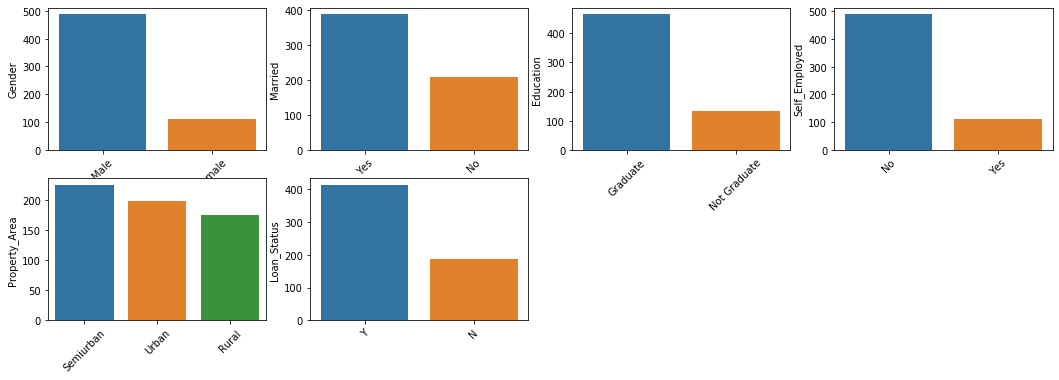

In [16]:
#visulazing the categorical columns
obj = (df.dtypes=='object')
obj_col = list(obj[obj].index)
plt.figure(figsize=(18,34))
index=1

for col in obj_col:
    y = df[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=45)
    sns.barplot(x=list(y.index),y=y)
    index += 1
    

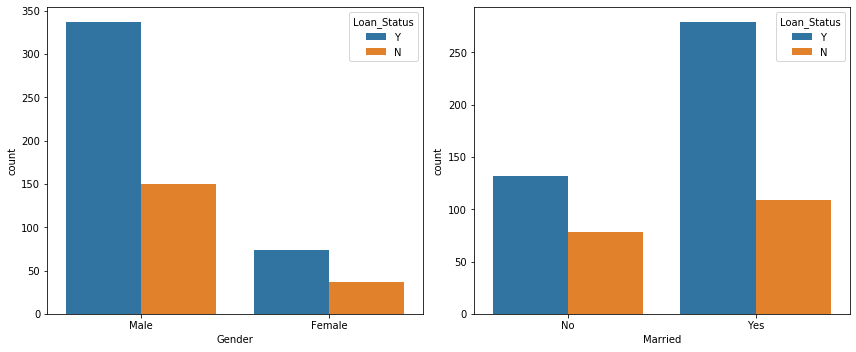

In [19]:
#Bivariate Analysis
plt.subplots(figsize=(12, 5))
for i, col in enumerate(['Gender', 'Married']):
    plt.subplot(1, 2, i+1)
    sns.countplot(data=df, x=col, hue='Loan_Status')
plt.tight_layout()
plt.show()


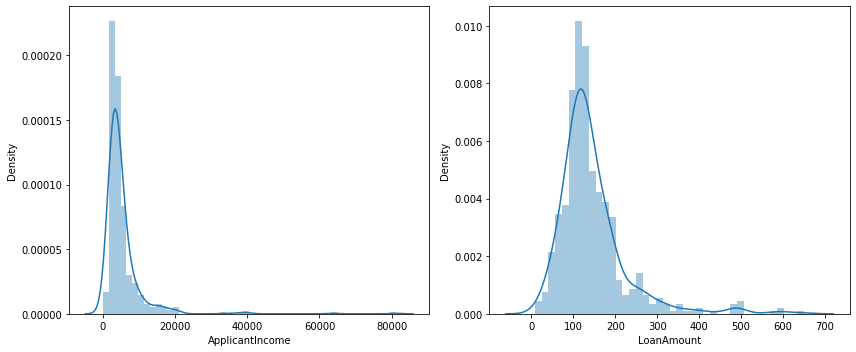

In [20]:
#ApplicantIncome v/s LoanAmount
plt.subplots(figsize=(12, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sns.distplot(df[col])
plt.tight_layout()
plt.show()


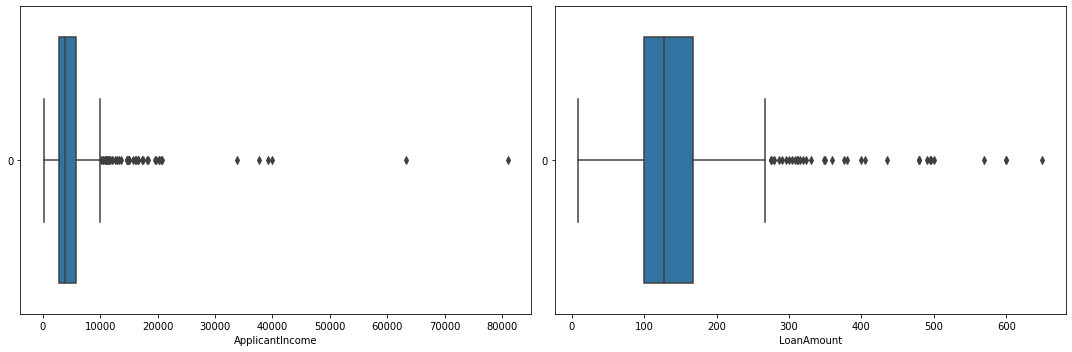

In [21]:
#To find put the utliers for the same columns that is ApplicantIncome v/s LoanAmount.We are creating the boxplot
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df[col],orient='horizontal')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


We can see that there are some outliers in the data. We can see that there are outliers in the ApplicantIncome more than 30000. Also, there are outliers in the LoanAmount that is more than 4lacs. We need to remove them.

In [22]:
#lets make changes
df = df[df['ApplicantIncome'] < 25000]
df = df[df['LoanAmount'] < 400000]


In [23]:
df.groupby('Gender').mean()['LoanAmount']

Gender
Female    126.697248
Male      146.872294
Name: LoanAmount, dtype: float64

In [24]:
#the same way let us check the mean amount of loan granted to both male and female as well as married or unmarried. 
df.groupby(['Married','Gender']).mean()['LoanAmount']

Married  Gender
No       Female    116.115385
         Male      135.959677
Yes      Female    153.322581
         Male      150.875740
Name: LoanAmount, dtype: float64

Here is one more interesting observation in addition to the previous one that the married people requested loan amount is generally higher than that of the unmarried. This may be one of the reason’s that we observe earlier that the chances of getting loan approval for a married person are lower than that compared to an unmarried person.

As all the categorical values are binary so we can use Label Encoder for all such columns and the values will change into int datatype.

In [27]:
# Import label encoder 
from sklearn.preprocessing import LabelEncoder

# label_encoder object knows how 
# to understand word labels.
label_encoder = LabelEncoder() 
obj = (df.dtypes == 'object') 
for col in list(obj[obj].index): 
    df[col] = label_encoder.fit_transform(df[col])


In [28]:
#let us again check the object datatype columns. to find out if there is still any left.
# To find the number of columns with 
# datatype==object 
obj = (df.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 0


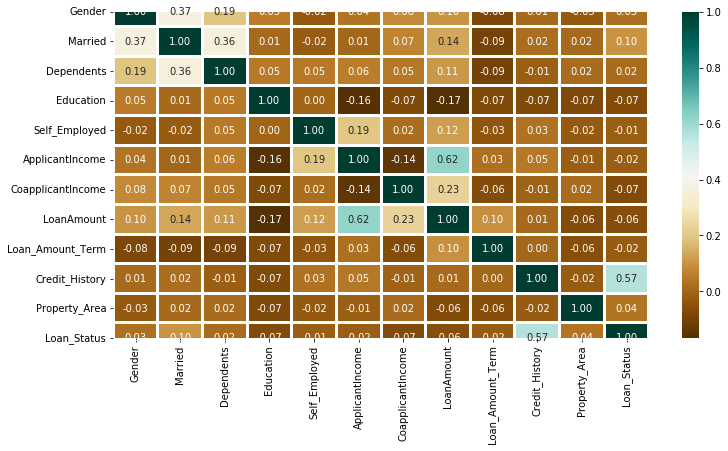

In [29]:
#let us plot the heatmap
plt.figure(figsize=(12,6)) 

sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)


The above heatmap is showing the correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status.

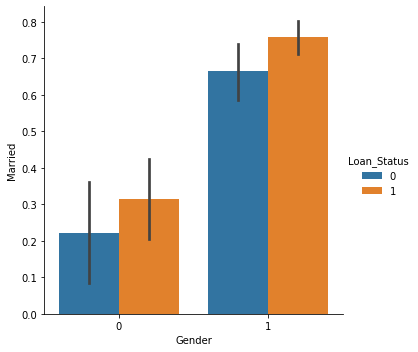

In [30]:
#now let us plot the catplot to visualize the plot for gender,marital status of the applicants.
sns.catplot(x='Gender', y='Married', hue='Loan_Status',kind="bar",data=df)

In [31]:
#Now we will find out if there is any missing values in the dataset using below code.

for col in df.columns: 
    df[col] = df[col].fillna(df[col].mean()) 

df.isna().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We can observe that there are no missing values in the dataset. We can now process to model training.

# Data Splitting

In [32]:
from sklearn.model_selection import train_test_split 

X = df.drop(['Loan_Status'],axis=1) 
y = df['Loan_Status'] 
X.shape,y.shape 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((342, 11), (229, 11), (342,), (229,))

# Model Building

In [41]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 

from sklearn import metrics 

knn = KNeighborsClassifier(n_neighbors=5) 
rfc = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state =7) 
svc = SVC() 
lc = LogisticRegression() 

# making predictions on the training set 
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_train) 
    print("Accuracy score of ", 
        clf.__class__.__name__, 
        "=",100*metrics.accuracy_score(y_train,y_pred))


Accuracy score of  RandomForestClassifier = 100.0
Accuracy score of  KNeighborsClassifier = 73.39181286549707
Accuracy score of  SVC = 67.2514619883041
Accuracy score of  LogisticRegression = 79.82456140350878


Predicting on the Test data

In [42]:
# making predictions on the testing set 
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test) 
    print("Accuracy score of ", 
        clf.__class__.__name__,"=", 
        100*metrics.accuracy_score(y_test,y_pred))


Accuracy score of  RandomForestClassifier = 84.27947598253274
Accuracy score of  KNeighborsClassifier = 67.24890829694323
Accuracy score of  SVC = 72.48908296943232
Accuracy score of  LogisticRegression = 84.71615720524017


Random Forest Classifier and Logistic Regression is giving the best accuracy with an accuracy score of 84% for the testing dataset.